# Gérez votre SIG Web avec l'API ArcGIS pour Python
L'exemple qui suit montre comment vous pouvez créer des utilisateurs, les ajouter à des groupes, gérer les services et d'autres commandes utiles.

Commençons par importer les librairies requises.

In [1]:
import os, sys, arcpy
from arcgis.gis import GIS #ArcGIS API for Python
import getpass #Masqueur de mots de passe

In [2]:
#Demandons les informations de connexion à l'utilisateur:
try:
    portalUrl = input("URL du portail: ")
    username = input("Nom d'utilisateur: ")
    pwd = getpass.getpass("Mot de passe: ")
    gis = GIS(portalUrl, username, pwd)
    print("SUCCÈS: Connecté à " + portalUrl + " avec sous " + username)
except:
    print("ERREUR: Quelque chose n'a pas fonctionné!")

URL du portail: https://esriquebec.maps.arcgis.com
Nom d'utilisateur: jgaudreau
Mot de passe: ········
SUCCÈS: Connecté à https://esriquebec.maps.arcgis.com avec sous jgaudreau


<User username:jgaudreau>
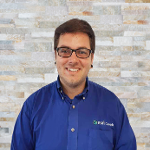

In [3]:
me = gis.users.me
me

# Maintenant, crééons un nouvel utilisateur et ajoutez le dans un groupe.

In [4]:
newUsername = input("Choisir le nom d'utilisateur: ")
newName = input("Prénom: ")
newLastName = input("Nom: ")
newEmail = input("Courriel: ")
newLevel = input("Niveau (1 ou 2): ")
demo_user1 = gis.users.create(username= newUsername,
                             password='Renard123',
                             firstname = newName,
                             lastname = newLastName,
                             email= newEmail,
                             level = newLevel,
                             provider= 'arcgis')
gis.users.get(newUsername)

Choisir le nom d'utilisateur: stevesteve123
Prénom: Steve
Nom: Steeve
Courriel: steve@esri.ca
Niveau (1 ou 2): 2


<User username:stevesteve123>

In [5]:
groupName = input("Enter the name of the group you want to place the user and the services: ")
myGroups= gis.groups.search('title:'+groupName)
if len(myGroups) == 0:
    print("Error: The group " + groupName + " does not exist!")
    createKey = input("Would you like to create a group called " + groupName + "? (y or n) ")
    if createKey == "y" or createKey == "Y":
        goodGroup = gis.groups.create(groupName,"python,uc")
        myGroups.append(goodGroup)
    else:
        print("This wizard will end now")
        sys.exit()
else:
    goodGroup = myGroups[0]

Enter the name of the group you want to place the user and the services: QuebecUC_SteveGroup
Error: The group QuebecUC_SteveGroup does not exist!
Would you like to create a group called QuebecUC_SteveGroup? (y or n) y


In [6]:
try:
    myGroups[0].add_users([newUsername])
    print("L'utilisateur " + newUsername + " a été ajouté au groupe "+ myGroups[0].title+" avec succès")
except:
    print("Erreur: impossible d'ajouter l'utilisateur " + newUsername + " au groupe " + myGroups[0].title)

L'utilisateur stevesteve123 a été ajouté au groupe QuebecUC_SteveGroup avec succès


In [7]:
listeMembres= myGroups[0].get_members()
listeMembres['users']

['stevesteve123']

# Maintenant, créons des utilisateurs en lot et mettons les dans un groupe, à partir d'un fichier CSV

On lit un fichier CSV et on crée un utilisateur pour chaque ligne.

In [8]:
#Ouverture d'un explorateur de fichier
from tkinter import filedialog #Librairie pour les interfaces graphiques
from tkinter import Tk #Librairie pour les interfaces graphiques
import csv
root = Tk()
root.withdraw()
filename = filedialog.askopenfilename()
filename2 = open(filename,"r")
head = filename2.readline()
lignes = filename2.read()
print(head)
print(lignes)

ï»¿nom,prenom,email,username,level

henri,de la croix,jgaudreau@esri.ca,hdelacroix2,2
raoul,duguay,jgaudreau@esri.ca,rduguay232,2


In [9]:
from arcgis.gis import GIS #ArcGIS API for Python
lignes2 = lignes.split("\n")
nbLignes = len(lignes.split("\n"))
for i in range(0, nbLignes):
    gis.users.create(username=lignes2[i].split(",")[3],password='Renard123',firstname=lignes2[i].split(",")[0],lastname=lignes2[i].split(",")[1],email=lignes2[i].split(",")[2],level=lignes2[i].split(",")[4],provider='arcgis')
    newUser = gis.users.get(lignes2[i].split(",")[3])
    myGroups[0]
    print("Utilisateur " + newUser.username + " créé avec succès!!")
    try:
        myGroups[0].add_users([newUser.username])
        print("Utilisateur " + newUser.username + " ajouté au groupe "+ myGroups[0].title+" avec succès!")
    except:
        print("Error: Impossible d'ajouter l'utilisateur " + newUser.username + " au groupe " + myGroups[0].title)
    

Utilisateur hdelacroix2 créé avec succès!!
Utilisateur hdelacroix2 ajouté au groupe QuebecUC_SteveGroup avec succès!
Utilisateur rduguay232 créé avec succès!!
Utilisateur rduguay232 ajouté au groupe QuebecUC_SteveGroup avec succès!


In [10]:
henri = gis.users.get(lignes2[0].split(",")[3])
henri

<User username:hdelacroix2>

In [12]:
gis.content.create_folder('packages2')

{'username': 'jgaudreau',
 'id': 'a3be5aaece0948fa91dd684556b2fb98',
 'title': 'packages2'}

In [13]:
lpk_item = gis.content.add({'title':"Mon gabarit de service",'description':'Ceci est un service','tags':'arcgis,python','type':'File Geodatabase'},data= r"D:\OneDrive - Esri Canada\Presentations\TOR_UC_2018\data\AutomateYourGIS.zip",folder='packages2')

In [14]:
myServiceTemplate = lpk_item.publish()

In [15]:
myServiceTemplate.share(groups=[myGroups[0]])

{'notSharedWith': [''], 'itemId': '44945d8329b04b1dbae408ccf737e23d'}

In [16]:

from arcgis.features import FeatureLayer
import pandas as pd

In [17]:
wifiLayer = FeatureLayer("https://services.arcgis.com/3MrgBYsx9oKZpmLl/arcgis/rest/services/BornesWIFI/FeatureServer/0")

In [18]:
#On fait une requête dans la couche de wifi
wifi_features = wifiLayer.query()
print('Nombre de points dans la couche de Wifi: ')
print(len(wifi_features.features))

Nombre de points dans la couche de Wifi: 
320


In [19]:
wifi_features.df.head()

,Arrondisse,GlobalID,ID,Latitude,Lieu,Longitude,OBJECTID,Type,X,Y,SHAPE
0,Ville-Marie,67617e92-ba27-4f82-b7d8-826a98c2ffa9,4HA01,45.50472,Rue Saint Jacques / Place d'Armes,-73.55792,1,Intersection,300273.915871,5.040535e+06,"{'x': 300273.9159000004, 'y': 5040534.8258, 's..."
1,Ville-Marie,824bc51f-aee2-4393-997d-9655f75a397c,4HA02,45.50486,Rue Notre-Dames/ Place d'Armes,-73.55660,2,Intersection,300377.076541,5.040550e+06,"{'x': 300377.07650000043, 'y': 5040550.3105999..."
2,Ville-Marie,175cec06-7f80-4087-b8c0-477ac159bc6e,4HA04,45.50578,Rue Le Royer / boul. Saint-Laurent,-73.55467,3,Intersection,300527.963129,5.040652e+06,"{'x': 300527.9631000003, 'y': 5040652.4462, 's..."
3,Outremont,7d6ae455-14dd-4a72-a812-c3d68d24336f,4HA05,45.50393,Rue Saint-Suplice / rue de la Commune,-73.55381,4,Intersection,300595.027736,5.040447e+06,"{'x': 300595.02770000044, 'y': 5040446.8093, '..."
4,Ville-Marie,911483e2-74b5-4a9d-9c18-61b4909e7fbc,4HA06,45.50321,Place Royale/rue de la Commune,-73.55398,5,Intersection,300581.689347,5.040367e+06,"{'x': 300581.68929999974, 'y': 5040366.8043000..."


In [ ]:
wifi_features.df.tail()

### Maintenant, jouons avec matplotlib, la librairie de graphiques.

Tout ce que vous avez besoin est de fournir des données et les étiquettes pour les x, y et le titre

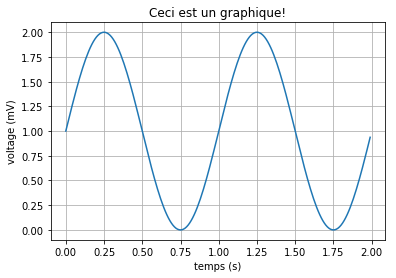

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='temps (s)', ylabel='voltage (mV)',
       title='Ceci est un graphique!')
ax.grid()
plt.show()

## Maintenant, jouons avec des cartes!
Souvenez vous, on a qu'à ajouter une carte avec gis.map(adresse, échelle)

In [22]:
MyMap = gis.map("Montreal",10)
MyMap

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

In [24]:
MyMap.add_layer(wifiLayer)

In [ ]:
MyMap2 = gis.map("1425 René-Lévesque O, Montréal",5)
MyMap2.add_layer(wifiLayer)
MyMap2

In [25]:
from arcgis.mapping import WebMap
wm_item = gis.content.get('b74d3d6b7cf345f5bcab192d5f940732')

# create a WebMap object from the existing web map item
wm = WebMap(wm_item)
wm

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))